# Managing AOIs across projections

grab aoi from geojson.io

what pixels should get grabbed from the landsat scene in:
1. epsg 32636
2. epsg 5072

how complicated should this equation be?

what does a minimum_rotated_rectangle look like?

Can folium project maps in AEA for example? -- how ugly do they look?

simple rectangles or more sophisticated linear transforms

1. start by displaying the problem with folium
2. lc_display

In [1]:
from lilcubeLib.lc_display import Ldisplay

In [2]:
ld = Ldisplay()

creating Ldisplay class


In [3]:
!ls

 00-odc-lite-handbook-via-notebooks.ipynb   fake_PR_2.geojson
 a0-geojson-handbook.ipynb		   'map(1).geojson'
 a1-elastic-search-handbook.ipynb	   'map(2).geojson'
 a2-xarray-handbook.ipynb		    map.geojson
 a4-map-projection-handbook.ipynb	    p1-aoi-map-projection-hell.ipynb
 fake_path_row.geojson			    pine_lake.geojson
 fake_PR_1.geojson			    search_input.geojson


In [4]:
my_aoi='pine_lake.geojson'
m = ld.map_geojson(my_aoi)

[[[-119.35272216796874, 36.81808022778526], [-119.2510986328125, 36.81808022778526], [-119.2510986328125, 36.91915611148194], [-119.35272216796874, 36.91915611148194], [-119.35272216796874, 36.81808022778526]]]
MAP [[-119.35272216796874, 36.81808022778526], [-119.2510986328125, 36.81808022778526], [-119.2510986328125, 36.91915611148194], [-119.35272216796874, 36.91915611148194], [-119.35272216796874, 36.81808022778526]]
[-119.35272216796874, 36.81808022778526]
(36.81808022778526, -119.35272216796874)
[-119.2510986328125, 36.81808022778526]
(36.81808022778526, -119.2510986328125)
[-119.2510986328125, 36.91915611148194]
(36.91915611148194, -119.2510986328125)
[-119.35272216796874, 36.91915611148194]
(36.91915611148194, -119.35272216796874)
[-119.35272216796874, 36.81808022778526]
(36.81808022778526, -119.35272216796874)


In [5]:
m

In [6]:
m = ld.map_min_rect(my_aoi)

[[[-119.35272216796874, 36.81808022778526], [-119.2510986328125, 36.81808022778526], [-119.2510986328125, 36.91915611148194], [-119.35272216796874, 36.91915611148194], [-119.35272216796874, 36.81808022778526]]]
MAP [[-119.35272216796874, 36.81808022778526], [-119.2510986328125, 36.81808022778526], [-119.2510986328125, 36.91915611148194], [-119.35272216796874, 36.91915611148194], [-119.35272216796874, 36.81808022778526]]
[-119.35272216796874, 36.81808022778526]
(36.81808022778526, -119.35272216796874)
[-119.2510986328125, 36.81808022778526]
(36.81808022778526, -119.2510986328125)
[-119.2510986328125, 36.91915611148194]
(36.91915611148194, -119.2510986328125)
[-119.35272216796874, 36.91915611148194]
(36.91915611148194, -119.35272216796874)
[-119.35272216796874, 36.81808022778526]
(36.81808022778526, -119.35272216796874)
COO: (array('d', [-119.35272216796874, -119.2510986328125, -119.25103002490626, -119.352790775875, -119.35272216796874]), array('d', [36.81808022778527, 36.81808022778527

In [7]:
m

'BOMB'

In [8]:
import pygeoj
help(pygeoj)

Help on module pygeoj:

NAME
    pygeoj - # PyGeoj

DESCRIPTION
    PyGeoj is a simple Python GeoJSON file reader and writer intended for end-users.
    It exposees dictionary structures as high level objects with convenience methods,
    so the user does not have to get caught up in the details of the format specification. 
    
    
    ## Platforms
    
    Python 2 and 3. 
    
    
    ## Dependencies
    
    Pure Python, no dependencies. 
    
    
    ## Installing it
    
    PyGeoj is installed with pip from the commandline:
    
        pip install pygeoj
    
    It also works to just place the "pygeoj" package folder in an importable location like 
    "PythonXX/Lib/site-packages". 
    
    
    ## Example Usage
    
    Begin by importing the pygeoj module:
    
        import pygeoj
    
    ### Reading
    
    Reading geojson formatted GIS files is a simple one-liner (requires the geojson file to be a
    "FeatureCollection"):
    
        testfile = pygeoj.load(filep

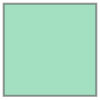

In [9]:
# https://medium.com/@pramukta/recipe-importing-geojson-into-shapely-da1edf79f41d
import json
from shapely.geometry import shape, GeometryCollection

#with open("geojson_file.geojson") as f:
with open(my_aoi) as f:
  features = json.load(f)["features"]

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
geometry = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
geometry

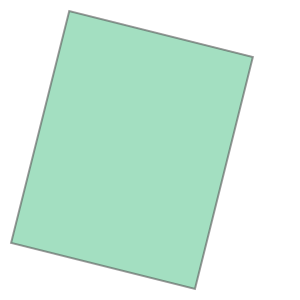

In [10]:
from functools import partial
import shapely.ops
import pyproj

# Suppose geometry is an instance of shapely.geometry.Geometry
tfm = partial(pyproj.transform, 
              pyproj.Proj(init="epsg:4326"), 
              pyproj.Proj(init="epsg:5072"))
reprojected = shapely.ops.transform(tfm, geometry)

reprojected

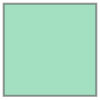

In [11]:
geometry

In [12]:
mrr = reprojected.minimum_rotated_rectangle

In [13]:
mrr.to_wkt()

'POLYGON ((-2043090.4520859094336629 1782670.5520639051683247, -2034378.0942100426182151 1780490.4360251380130649, -2031629.0320179925765842 1791476.4630137281492352, -2040341.3898938593920320 1793656.5790524953044951, -2043090.4520859094336629 1782670.5520639051683247))'

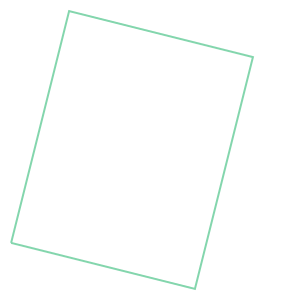

In [14]:
mrr.boundary

In [15]:
mrr.wkt

'POLYGON ((-2043090.452085909 1782670.552063905, -2034378.094210043 1780490.436025138, -2031629.032017993 1791476.463013728, -2040341.389893859 1793656.579052495, -2043090.452085909 1782670.552063905))'

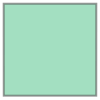

In [16]:
tfm = partial(pyproj.transform, 
              pyproj.Proj(init="epsg:5072"), 
              pyproj.Proj(init="epsg:4326"))
reprojected = shapely.ops.transform(tfm, mrr)
reprojected

In [17]:
reprojected.wkt

'POLYGON ((-119.3527221679687 36.81808022778527, -119.2510986328125 36.81808022778527, -119.2510300249063 36.91915608256794, -119.352790775875 36.91915608256791, -119.3527221679687 36.81808022778527))'

In [18]:
dir(mrr)

['__and__',
 '__array_interface__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_exterior',
 '_geom',
 '_get_coords',
 '_interiors',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'exterior',
 'from_bounds',
 'geom_type',
 'geometryTy

In [19]:
reprojected.to_wkt()

'POLYGON ((-119.3527221679687358 36.8180802277852735, -119.2510986328125000 36.8180802277852735, -119.2510300249062567 36.9191560825679375, -119.3527907758749933 36.9191560825679090, -119.3527221679687358 36.8180802277852735))'

In [20]:
# !find ../ -name "*.geojson"
my_aoi2 = '../01-index-California-TIF-lsaa-staging-cogs/lake_rumira.geojson'

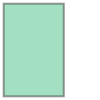

In [21]:
# https://medium.com/@pramukta/recipe-importing-geojson-into-shapely-da1edf79f41d
import json
from shapely.geometry import shape, GeometryCollection

#with open("geojson_file.geojson") as f:
with open(my_aoi2) as f:
  features = json.load(f)["features"]

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
geometry = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
geometry

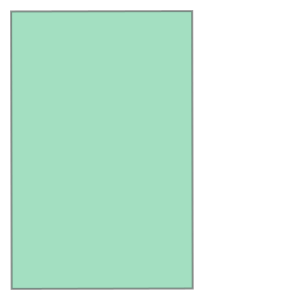

In [22]:
tfm = partial(pyproj.transform, 
              pyproj.Proj(init="epsg:4326"), 
              pyproj.Proj(init="epsg:32636"))
reprojected = shapely.ops.transform(tfm, geometry)

reprojected

In [23]:
# dir(reprojected)

In [24]:
wkt = reprojected.to_wkt()

In [25]:
wkt

'GEOMETRYCOLLECTION (POLYGON ((189765.7482067834935151 -245676.7759340012271423, 189752.8918814703356475 -238767.0574028196278960, 194262.9833942720433697 -238758.8456645985424984, 194275.6522413095226511 -245668.3270252629299648, 189765.7482067834935151 -245676.7759340012271423)))'

In [26]:
# dir(reprojected.centroid)

In [27]:
# dir(reprojected.centroid.coords)

In [28]:
# dir(reprojected.centroid.coords.xy)

In [29]:
x = reprojected.centroid.coords.xy[0]
x

array('d', [192014.30596766845])

In [30]:
x[0]

192014.30596766845

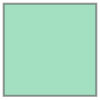

In [31]:
with open(my_aoi) as f:
  features = json.load(f)["features"]

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
geometry = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])
geometry

In [32]:
my_plot_center = (geometry.centroid.xy[0][0], geometry.centroid.xy[1][0])

In [33]:
my_plot_center

(-119.30191040039062, 36.8686181696336)

In [34]:
lat,lon = (36.81808022778526, -119.35272216796874)


In [36]:
lat

36.81808022778526

In [37]:
lon

-119.35272216796874

In [41]:
# http://all-geo.org/volcan01010/2012/11/change-coordinates-with-pyproj/
import pyproj

p5072 = pyproj.Proj("+init=EPSG:5072")

y,x = p5072(lon,lat)

y,x

(-2043090.4520859097, 1782670.5520639066)

In [44]:
# NOPE
# x,y = p5072(lat,lon)

# x,y

(1e+30, 1e+30)

In [39]:
redfile = 's3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140131_20171310_01_A1/LC08_L2SP_042034_20140131_20171310_01_A1_sr_band4.TIF'
